In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline



In [35]:
titanic = pd.read_csv('Titanic.csv')
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,Brittany Ward,male,69,2,3,75eb0e8f-a090-460d-a7c7-655a7b434a72,19.87,Q,1
996,997,2,Edward Stanley,female,61,4,4,e55b93ad-8976-4471-9d7f-57d1e45def26,85.35,C,0
997,998,3,Christina Johnson,male,10,4,1,d06d3943-c8b3-415e-b664-704355c9bf0f,444.22,C,0
998,999,3,Edgar Miller,male,50,3,2,0e5779ec-be1a-470f-ad83-a4c869f8d3e4,234.67,S,1


In [36]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [37]:
titanic.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.964000,38.458000,2.032000,2.005000,247.968650,0.492000
std,288.819436,0.820596,23.103723,1.424431,1.410306,139.301211,0.500186
min,1.000000,1.000000,1.000000,0.000000,0.000000,10.020000,0.000000
25%,250.750000,1.000000,19.000000,1.000000,1.000000,126.295000,0.000000
50%,500.500000,2.000000,36.500000,2.000000,2.000000,246.500000,0.000000
75%,750.250000,3.000000,59.000000,3.000000,3.000000,365.662500,1.000000
max,1000.000000,3.000000,79.000000,4.000000,4.000000,499.780000,1.000000


In [38]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


In [39]:
titanic.dtypes


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Survived         int64
dtype: object

In [40]:
titanic.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

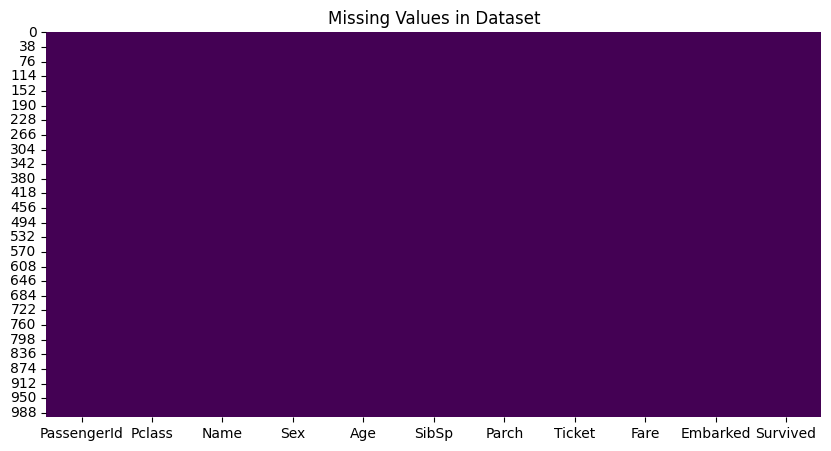

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

In [58]:
titanic.columns
#cate_tit=titanic[['Sex','Embarked']]
#cate_tit=pd.get_dummies(cate_tit,columns=['Sex','Embarked'])
#cate_tit = cate_tit.astype(int)
#titanic=pd.concat([titanic,cate_tit], axis=1)
#titanic= titanic.drop(['Sex','Embarked'],axis=1)
titanic

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived,Sex_female,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,Allison Hill,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,1,0,...,0,1,0,1,0,0,1,0,1,0
1,2,1,Noah Rhodes,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,0,0,...,0,1,0,0,1,0,1,0,0,1
2,3,3,Angie Henderson,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,1,0,...,0,1,0,1,0,0,1,0,1,0
3,4,3,Daniel Wagner,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,1,0,...,0,1,1,0,0,0,1,1,0,0
4,5,1,Cristian Santos,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,1,1,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,Brittany Ward,69,2,3,75eb0e8f-a090-460d-a7c7-655a7b434a72,19.87,1,0,...,0,1,0,1,0,0,1,0,1,0
996,997,2,Edward Stanley,61,4,4,e55b93ad-8976-4471-9d7f-57d1e45def26,85.35,0,1,...,1,0,1,0,0,1,0,1,0,0
997,998,3,Christina Johnson,10,4,1,d06d3943-c8b3-415e-b664-704355c9bf0f,444.22,0,0,...,0,1,1,0,0,0,1,1,0,0
998,999,3,Edgar Miller,50,3,2,0e5779ec-be1a-470f-ad83-a4c869f8d3e4,234.67,1,0,...,0,1,0,0,1,0,1,0,0,1


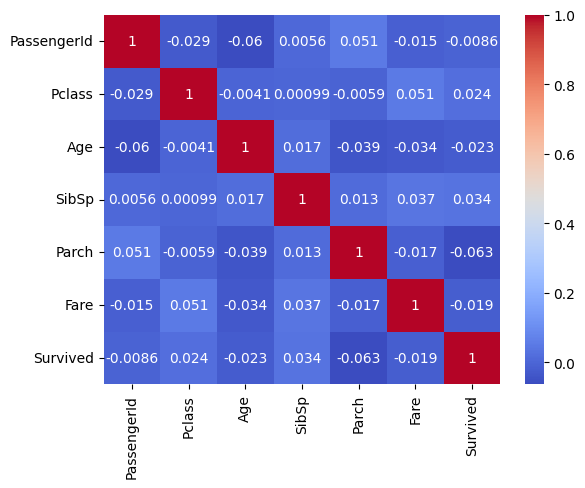

In [9]:
'''rel=titanic.corr()
sns.heatmap(rel, annot=True, cmap='coolwarm')'''

titanic_numeric = titanic.select_dtypes(include=['number'])

rel = titanic_numeric.corr()
sns.heatmap(rel, annot=True, cmap='coolwarm')
#plt.savefig("coorelation.png")
plt.show()



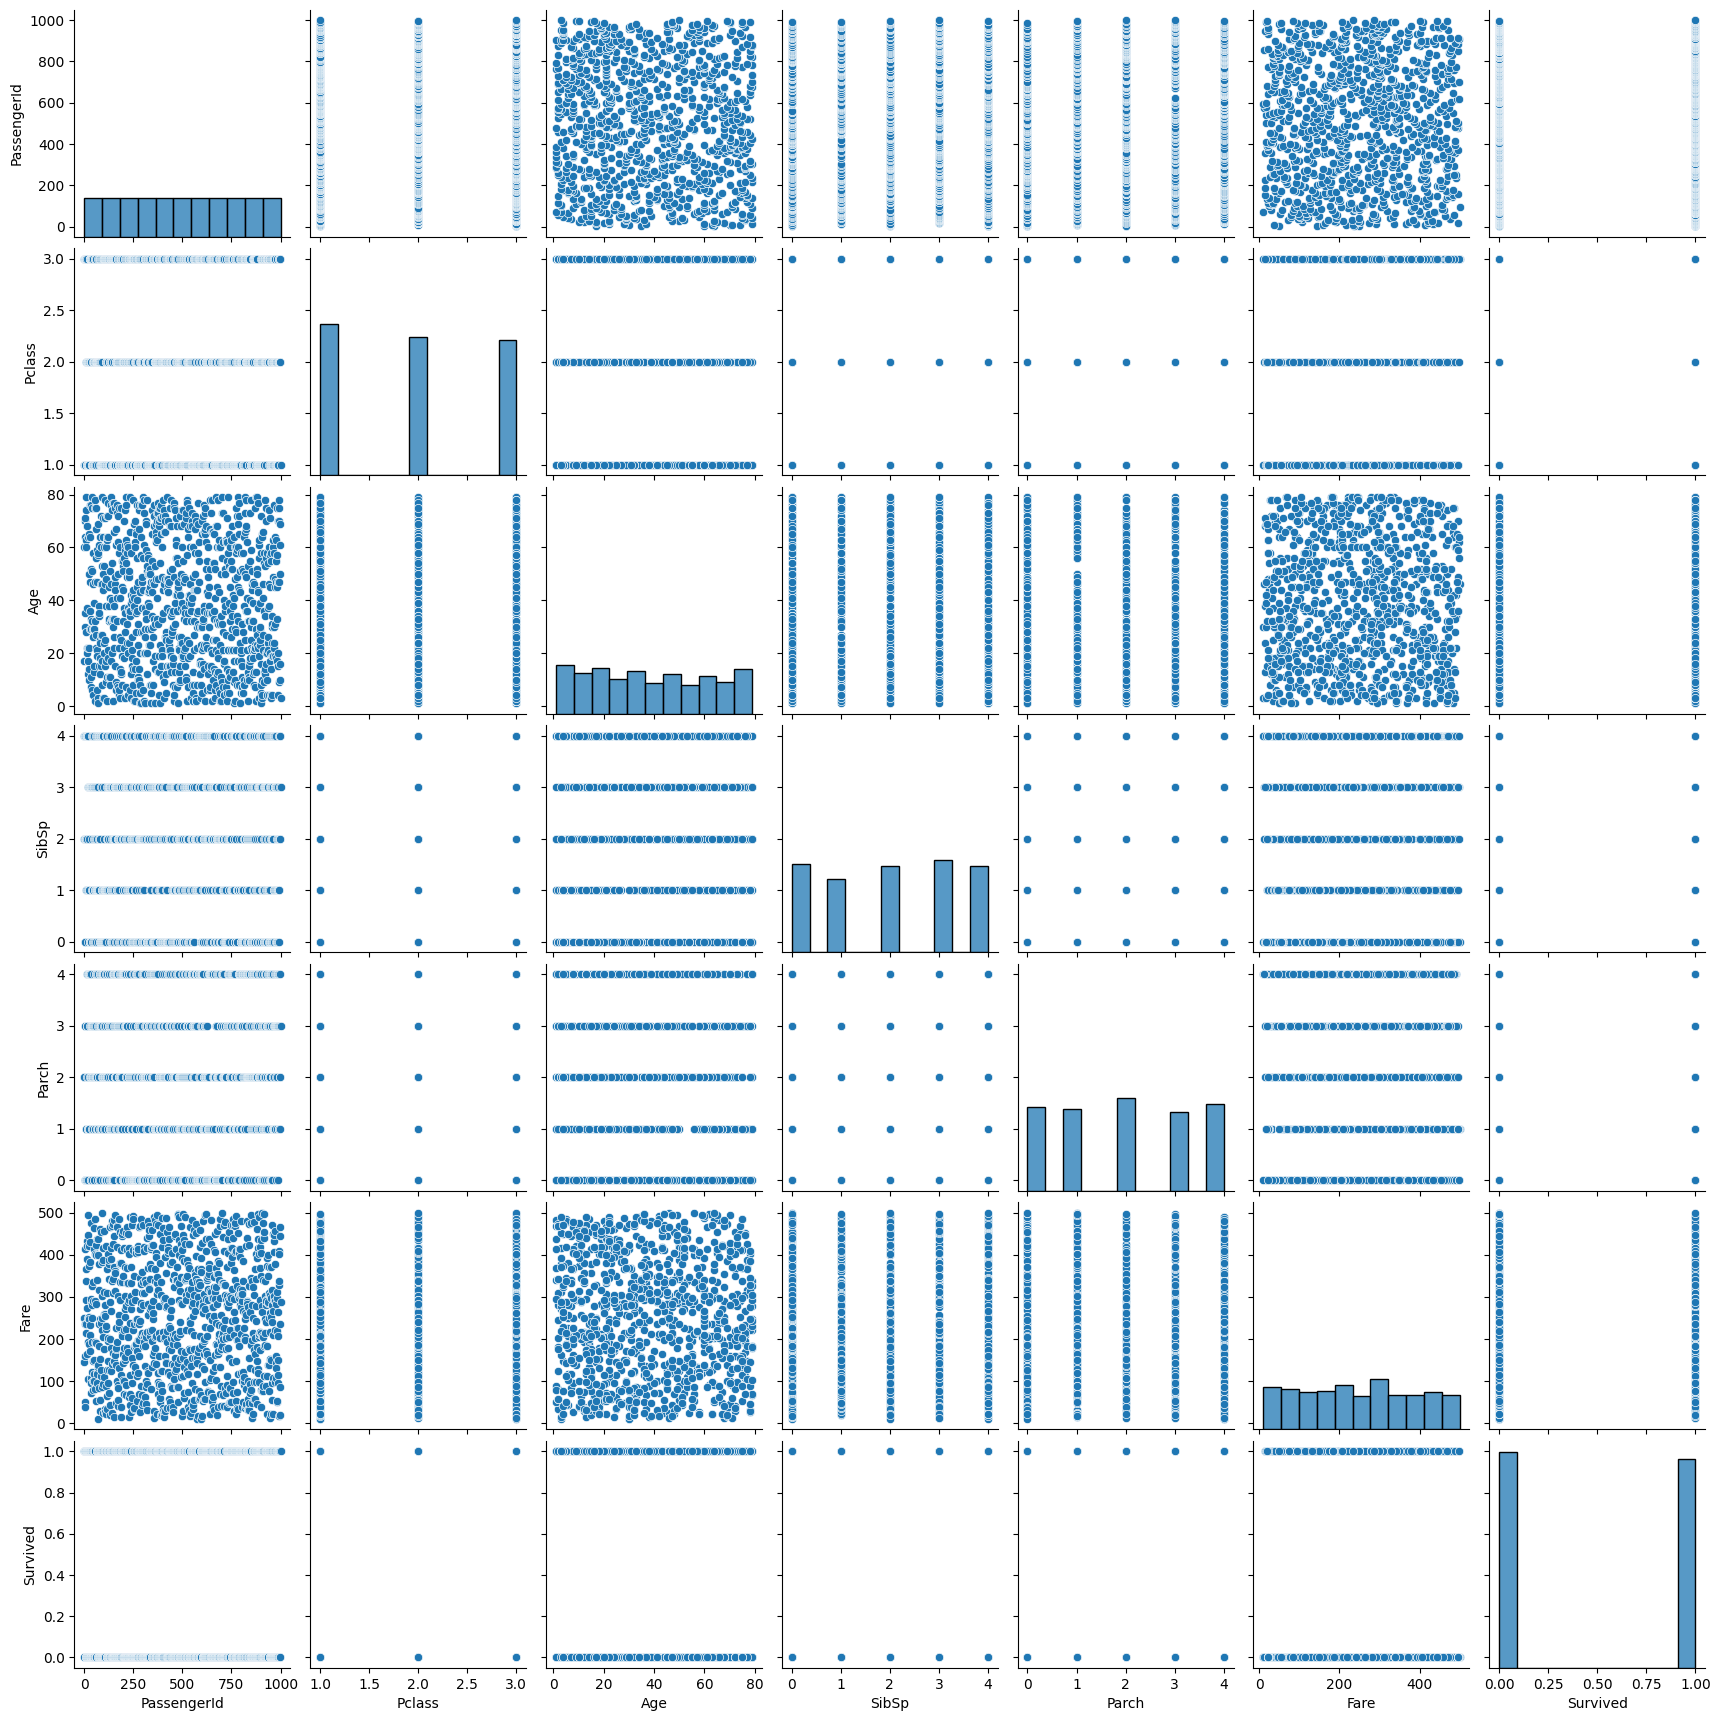

In [10]:
sns.pairplot(titanic)
#plt.savefig("pairplot.png")
plt.show()


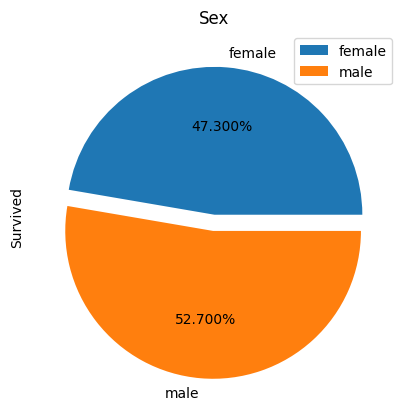

In [11]:
explode_values = (0.01, 0.1)
gender = titanic.groupby(['Sex'])['Survived'].count()
gender.plot(kind='pie', autopct = '%1.3f%%', legend = True, title = 'Sex', explode=explode_values)
#plt.savefig("gender.png")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_1776\3899408068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=titanic, palette="coolwarm")


Overall Survival Rate: 49.20%


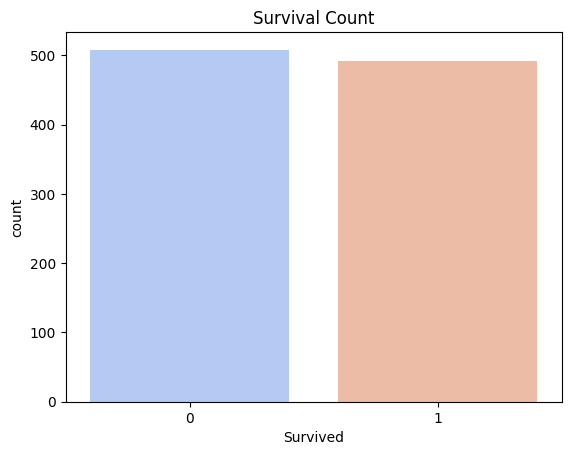

In [12]:
sns.countplot(x="Survived", data=titanic, palette="coolwarm")
plt.title("Survival Count")


survival_rate = titanic["Survived"].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")
#plt.savefig("survival.png")
plt.show()

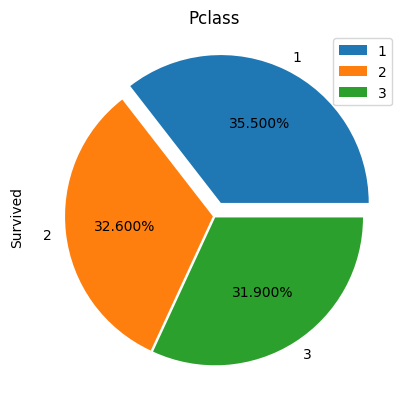

In [13]:

passenger_class = titanic.groupby(['Pclass'])['Survived'].count()
passenger_class.plot(kind='pie', autopct = '%1.3f%%', legend = True, title = 'Pclass', explode=(0.1,0.01,0.01))
#plt.savefig("pasenger_class.png")
plt.show()


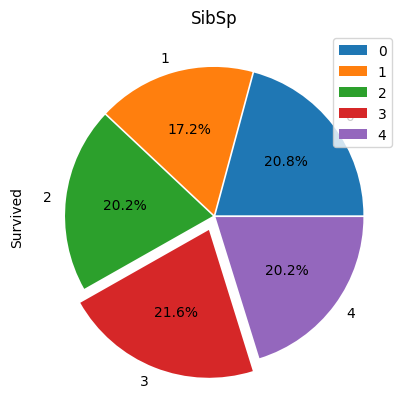

In [14]:

sibling_spouse= titanic.groupby(['SibSp'])['Survived'].count()
sibling_spouse.plot(kind='pie', autopct = '%1.1f%%', legend = True, title = 'SibSp', explode=(0.01,0.01,0.01,0.1,0.01))
#plt.savefig("sibbling.png")
plt.show()


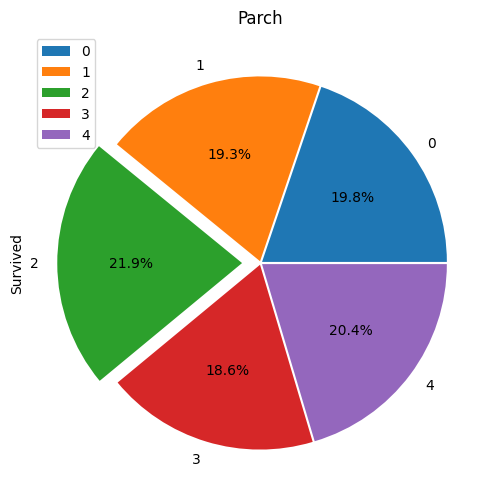

In [15]:
plt.figure(figsize=(6,6))
parents_child = titanic.groupby(['Parch'])['Survived'].count()
parents_child.plot(kind='pie', autopct = '%1.1f%%', legend = True, title = 'Parch', explode=(0.01,0.01,0.1,0.01,0.01))
#plt.savefig("parch.png")
plt.show()


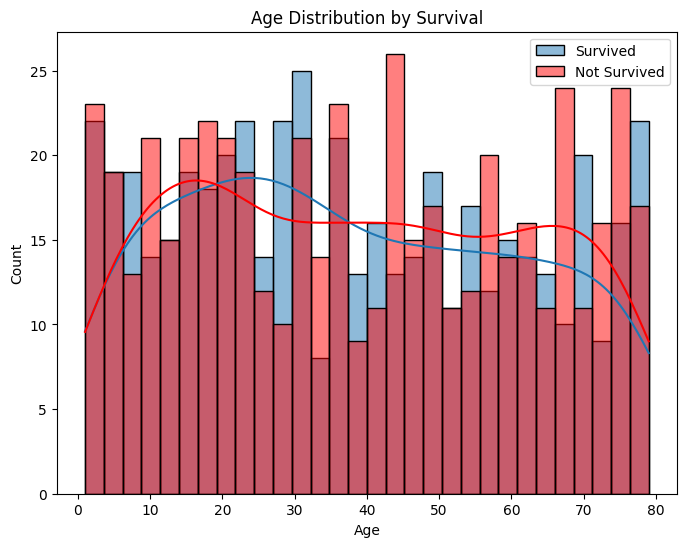

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(titanic[titanic["Survived"] == 1]["Age"], bins=30, label="Survived", kde=True)
sns.histplot(titanic[titanic["Survived"] == 0]["Age"], bins=30, label="Not Survived", kde=True, color="red")
plt.legend()
plt.title("Age Distribution by Survival")
#plt.savefig("age_destribution_survival.png")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_1776\1822828999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=titanic, palette="plasma")


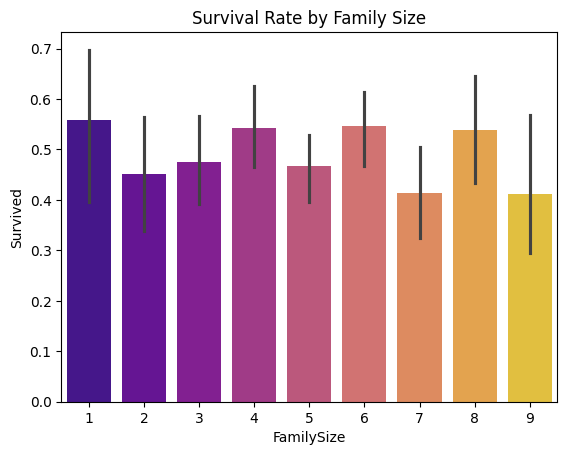

In [17]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

sns.barplot(x="FamilySize", y="Survived", data=titanic, palette="plasma")
plt.title("Survival Rate by Family Size")
#plt.savefig("survival_rate_by_family.png")
plt.show()



In [60]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Survived', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [63]:
X =titanic.drop(['PassengerId','Name','Ticket','Survived'], axis=1)
#titanic.head(5)

In [64]:
y = titanic['Survived']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
#X_train = X_train.to_numpy()
#y_train = y_train.to_numpy()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [127]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = XGBClassifier(random_state=42)
grid = GridSearchCV(xgb_model, params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


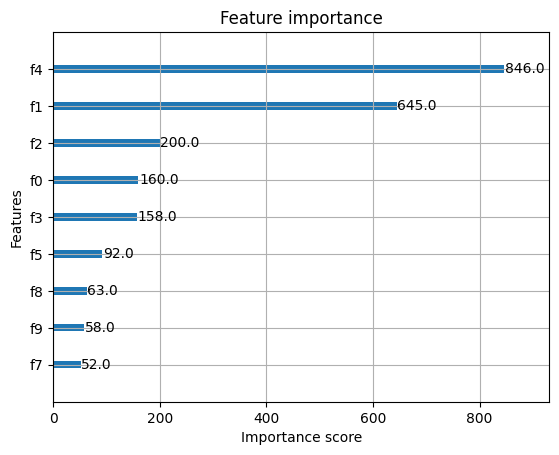

In [128]:
from xgboost import plot_importance

xgb_model.fit(X_train, y_train)
plot_importance(xgb_model)
plt.show()




In [129]:
y_pred_xgb = best_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.55      0.52      0.53       106
           1       0.49      0.52      0.51        94

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



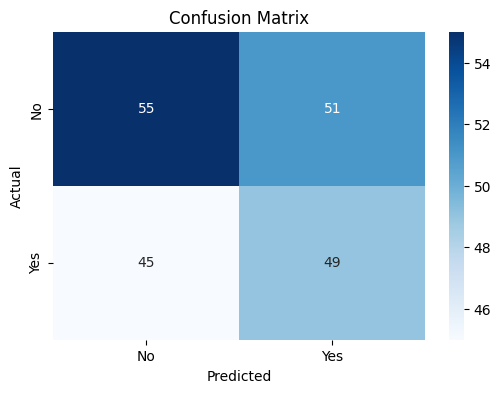

In [130]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Visualizing the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [131]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.55      0.52      0.53       106
           1       0.49      0.52      0.51        94

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

